# 1. Resolver as dependências

In [4]:
!pip install tensorflow keras keras-rl2 gym gym[atari] ale-py

# 2. Setup

In [5]:
import gym
import ale_py
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import rl
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

C:\Users\thiag\anaconda3\envs\new_env\lib\site-packages\ale_py\roms\__init__.py:94: DeprecationWarning: Automatic importing of atari-py roms won't be supported in future releases of ale-py. Please migrate over to using `ale-import-roms` OR an ALE-supported ROM package. To make this warning disappear you can run `ale-import-roms --import-from-pkg atari_py.atari_roms`.For more information see: https://github.com/mgbellemare/Arcade-Learning-Environment#rom-management
  _RESOLVED_ROMS = _resolve_roms()


In [6]:
print('gym:', gym.__version__)
print('ale_py:', ale_py.__version__)
print('numpy:', np.__version__)
print('tensorflow:', tf.__version__)
print('keras:', keras.__version__)

gym: 0.21.0
ale_py: 0.7.3
numpy: 1.21.2
tensorflow: 2.5.0
keras: 2.5.0


In [7]:
#ENV_NAME = 'CartPole-v0'
#ENV_NAME = 'MsPacman-v0'
ENV_NAME = 'MsPacman-ram-v0'

In [8]:
env = gym.make(ENV_NAME)

In [9]:
env.unwrapped.get_action_meanings()

['NOOP',
 'UP',
 'RIGHT',
 'LEFT',
 'DOWN',
 'UPRIGHT',
 'UPLEFT',
 'DOWNRIGHT',
 'DOWNLEFT']

In [10]:
seed = 42
#seed = 123
max_steps_per_episode = 50000

In [11]:
np.random.seed(seed)
env.seed(seed)
nb_actions = env.action_space.n

# 3. Cria Deep Learning Model com Keras

In [12]:
def build_model(env):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(1,) + env.observation_space.shape))
    model.add(keras.layers.Dense(16))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dense(16))
    model.add(layers.Activation('relu'))
    model.add(layers.Dense(16))
    model.add(layers.Activation('relu'))
    model.add(layers.Dense(env.action_space.n))
    model.add(layers.Activation('linear'))
    #print(model.summary())
    return model

In [13]:
model = build_model(env)

# 4. Cria Agent com Keras-RL

In [14]:
def build_agent(model, env):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=max_steps_per_episode, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=env.action_space.n, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [15]:
dqn = build_agent(model, env)

In [16]:
dqn.compile(keras.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])

# 5. Treina 

In [20]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [21]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

Episode:2 Score:140.0


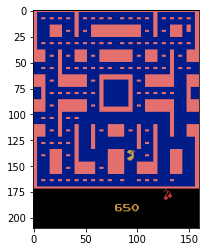

In [35]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
episodes = 2
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        img.set_data(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        action = random.choice([0,1,2,3,4,5])
#        action = np.random.get_state() 
        n_state, reward, done, info = env.step(action)
        score+=reward
        env.step(action)
        env.step(action)
    print('Episode:{} Score:{}'.format(episode, score))
        
env.close()

In [42]:
dqn.fit(env, nb_steps=max_steps_per_episode, visualize=False, verbose=1)
#dqn.fit(env, nb_steps=50000, visualize=True, verbose=1)

Training for 10000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 193s 19ms/step - reward: 0.3080
done, took 193.412 seconds


# 6. Preserva dados do Treino

In [19]:
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

In [45]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 210.000, steps: 811
Episode 2: reward: 210.000, steps: 811
Episode 3: reward: 210.000, steps: 978
Episode 4: reward: 210.000, steps: 968
Episode 5: reward: 210.000, steps: 980
Episode 6: reward: 210.000, steps: 803
Episode 7: reward: 210.000, steps: 816
Episode 8: reward: 210.000, steps: 802
Episode 9: reward: 210.000, steps: 984
Episode 10: reward: 210.000, steps: 815
Episode 11: reward: 210.000, steps: 809
Episode 12: reward: 210.000, steps: 991
Episode 13: reward: 210.000, steps: 818
Episode 14: reward: 210.000, steps: 936
Episode 15: reward: 210.000, steps: 811
Episode 16: reward: 210.000, steps: 813
Episode 17: reward: 210.000, steps: 802
Episode 18: reward: 210.000, steps: 794
Episode 19: reward: 210.000, steps: 811
Episode 20: reward: 210.000, steps: 809
Episode 21: reward: 210.000, steps: 805
Episode 22: reward: 210.000, steps: 986
Episode 23: reward: 210.000, steps: 791
Episode 24: reward: 210.000, steps: 800
Episode 25: reward: 

# 7. Recarrega dados do Treino na Memória

In [2]:
del model
del dqn
del env

NameError: name 'model' is not defined

In [37]:
env = gym.make(ENV_NAME)
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(env)
dqn = build_agent(model, env)
dqn.compile(keras.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])

In [34]:
dqn.load_weights('dqn_{}_weights.h5f'.format(ENV_NAME))

In [1]:
_ = dqn.test(env, nb_episodes=5, visualize=False)

NameError: name 'dqn' is not defined

In [3]:
env.history

NameError: name 'env' is not defined

In [ ]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
episodes = 2
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        img.set_data(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        action = random.choice([0,1,2,3,4,5])
#        action = np.random.get_state() 
        n_state, reward, done, info = env.step(action)
        score+=reward
        env.step(action)
        env.step(action)
    print('Episode:{} Score:{}'.format(episode, score))
        
env.close()